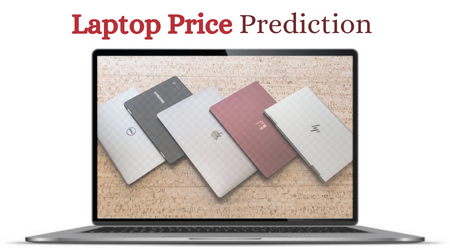

In [1]:
#Impport the libraries and dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn

ld = pd.read_csv('laptop_data.csv')

In [2]:
ld.sample(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
694,694,Toshiba,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.5kg,51841.44
548,548,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,1.86kg,21152.16
84,84,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,1TB HDD,AMD Radeon R5,Windows 10,2.1kg,21045.60
1018,1018,Toshiba,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.47kg,79387.20
180,180,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,256GB SSD + 2TB HDD,AMD Radeon 530,Linux,2.02kg,55890.72


# Basic understanding for data

In [3]:
print(ld.shape)

(1303, 12)


In [4]:
print(ld.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB
None


In [5]:
print(ld.duplicated().sum())

0


In [6]:
print(ld.isnull().sum())

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


In [7]:
#Drop unrequired column
ld.drop(columns=['Unnamed: 0'],inplace=True)

In [8]:
ld.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
201,Lenovo,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,2.1kg,26267.040
14,Apple,Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M m3 1.2GHz,8GB,256GB SSD,Intel HD Graphics 615,macOS,0.92kg,67260.672
767,Dell,Gaming,15.6,IPS Panel Touchscreen / 4K Ultra HD 3840x2160,Intel Core i7 6700HQ 2.6GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.72kg,58554.720
238,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,32GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1080,Windows 10,4.7kg,207259.200
139,HP,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.32kg,37242.720


#### Now split the mixed varibels.

In [9]:
#Ram---
ld['Ram'] = ld['Ram'].str.replace('GB','')

#Weight---
ld['Weight'] = ld['Weight'].str.replace('kg','')

#Change data type----
ld['Ram'] = ld['Ram'].astype('int32')
ld['Weight'] = ld['Weight'].astype('float32')

In [10]:
ld.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1015,Toshiba,Notebook,13.3,1366x768,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.50,64468.80
240,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,8,128GB SSD,Intel HD Graphics 520,Windows 10,2.20,31381.92
197,HP,Notebook,13.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,512GB SSD,Intel UHD Graphics 620,Windows 10,1.49,51095.52
676,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.10,60472.80
1218,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.60,67772.16


In [11]:
print(ld.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB
None


# EDA with Data

#### Price Distriution $

C:\Users\DELL\AppData\Local\Temp\ipykernel_8756\3950528201.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ld['Price'],


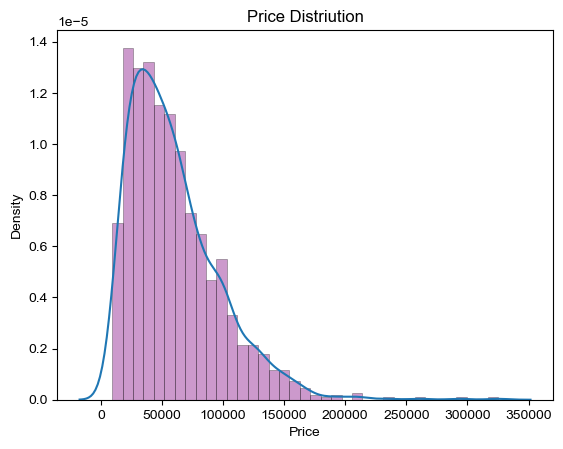

In [12]:
sns.distplot(ld['Price'],
             hist_kws={'color':'purple', 'edgecolor':'black',
                       'linewidth':.5, 'linestyle':'-'})
sns.set(rc={"figure.figsize":(7, 5)})
plt.title("Price Distriution")
plt.show()

### Company 🏢

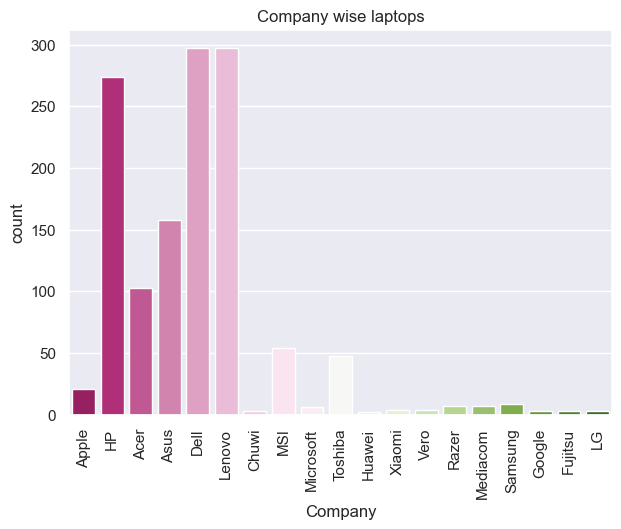

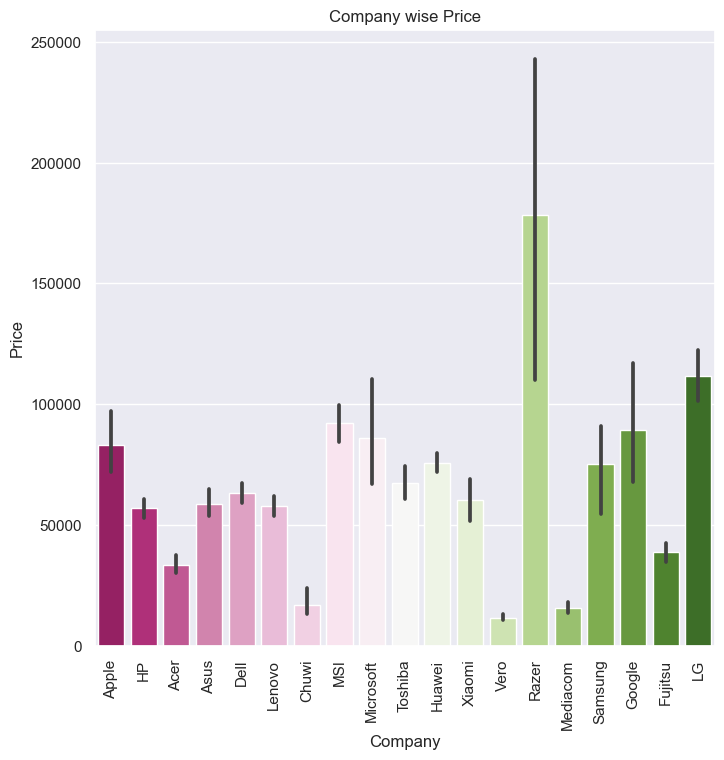

In [13]:
#Company wise laptops-------------
sns.countplot(x ='Company', data = ld,palette ='PiYG')
plt.xticks(rotation='vertical')
plt.title("Company wise laptops")
sns.set(rc={"figure.figsize":(8, 8)})
plt.show()

#Company with Price---------------
sns.barplot(x="Company", y="Price", data=ld, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(7, 7)})
plt.title("Company wise Price")
plt.show()

### TypeName 💻

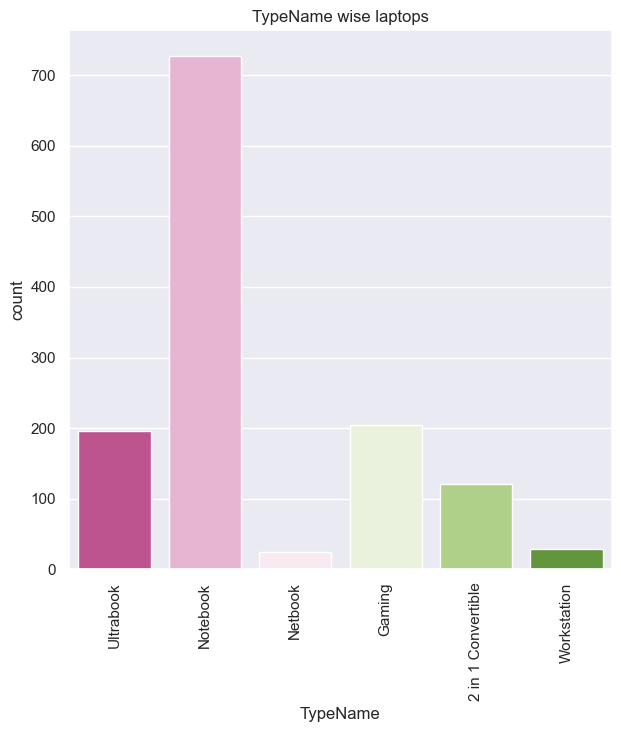

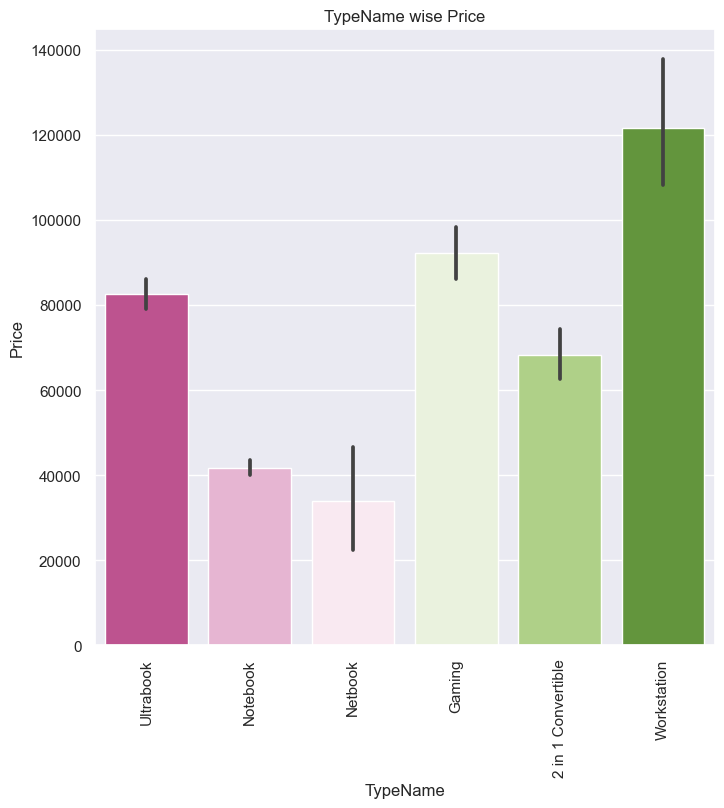

In [14]:
#TypeName wise laptops-------------
sns.countplot(x ='TypeName', data = ld,palette ='PiYG')
plt.xticks(rotation='vertical')
plt.title("TypeName wise laptops")
sns.set(rc={"figure.figsize":(8, 8)})
plt.show()

#TypeName with Price---------------
sns.barplot(x="TypeName", y="Price", data=ld, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(7, 7)})
plt.title("TypeName wise Price")
plt.show()

#### Inches 

C:\Users\DELL\AppData\Local\Temp\ipykernel_8756\3624617321.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ld['Inches'],


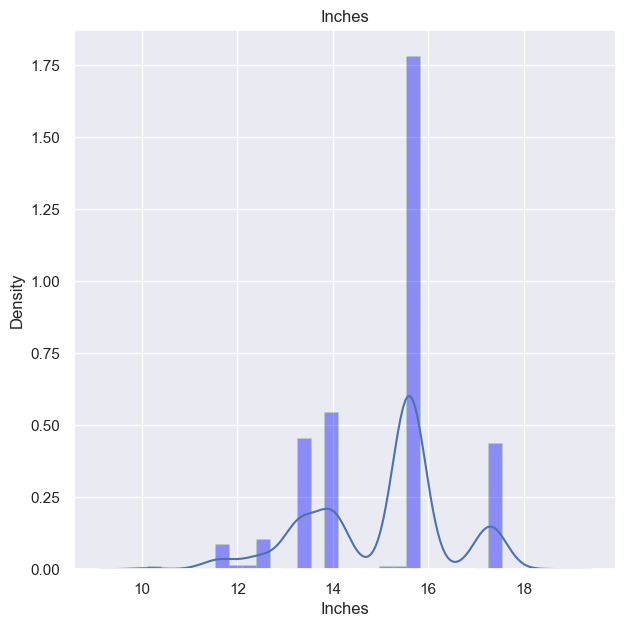

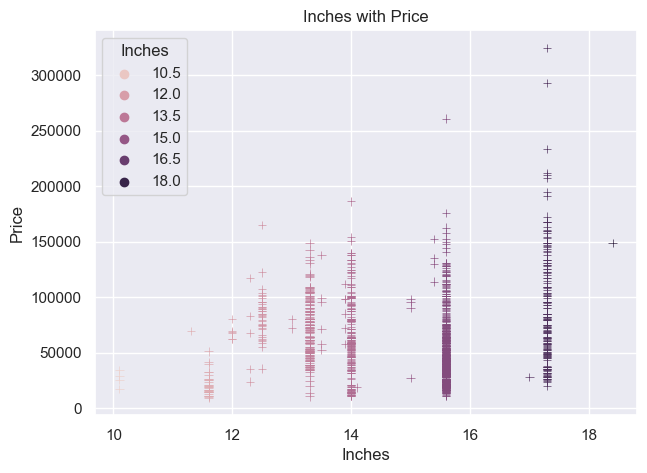

In [15]:
#DIst plot---------
sns.distplot(ld['Inches'],
             hist_kws={'color':'blue', 'edgecolor':'#aaff00',
                       'linewidth':.5, 'linestyle':'--'})
sns.set(rc={"figure.figsize":(7, 5)})
plt.title("Inches")
plt.show()

#Scatter plot--------------
seaborn.scatterplot(x="Inches",
                    y="Price",
                    hue="Inches",
                    marker = '+',
                    data=ld)
plt.title("Inches with Price")
sns.set(rc={"figure.figsize":(8, 8)})
plt.show()

### Work with Screen Resolution

In [16]:
print(ld['ScreenResolution'].value_counts())

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [17]:
#Split the column based on Touchscreen
ld['Touchscreen'] = ld['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
ld['Ips'] = ld['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [18]:
ld.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
705,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.18,42357.6000,0,0
820,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.10,26101.8720,0,0
1283,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0,0
216,Lenovo,Notebook,17.3,1600x900,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Nvidia GeForce GTX 940MX,No OS,2.80,31381.9200,0,0
534,Asus,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.30,87858.7200,0,1
633,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.20,30849.1200,0,0
1132,Asus,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.50,14811.8400,0,0
1258,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,1.0TB Hybrid,AMD Radeon R5 M330,Windows 7,2.32,47685.6000,0,0
793,Lenovo,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,AMD Radeon R7 M460,Windows 10,2.08,51095.5200,1,0
579,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,AMD Radeon R5 M430,Linux,2.20,39907.2528,0,0


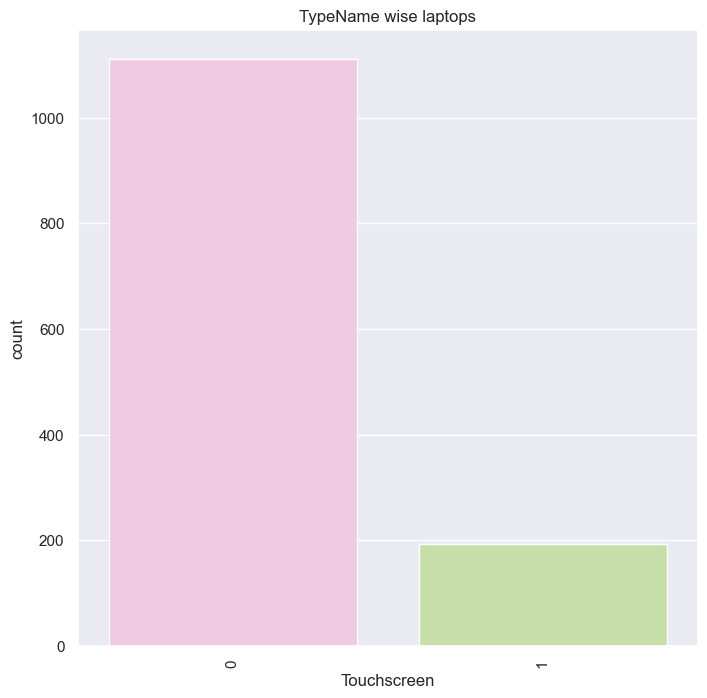

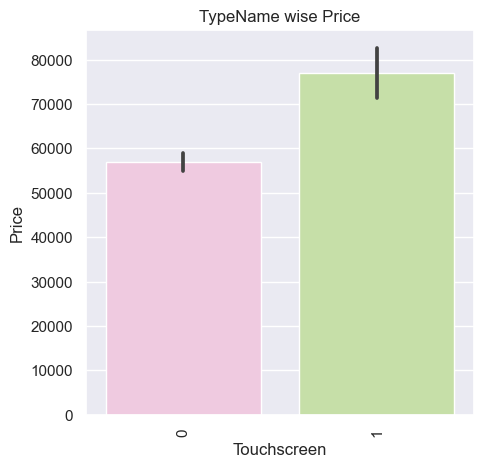

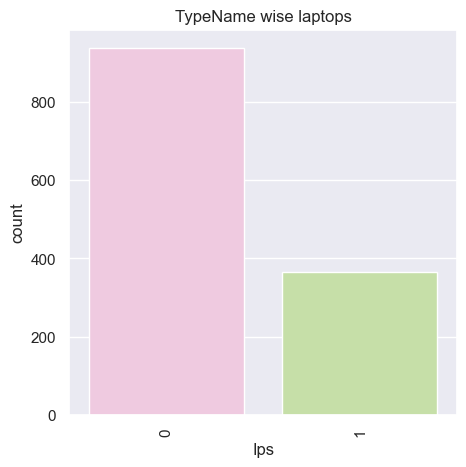

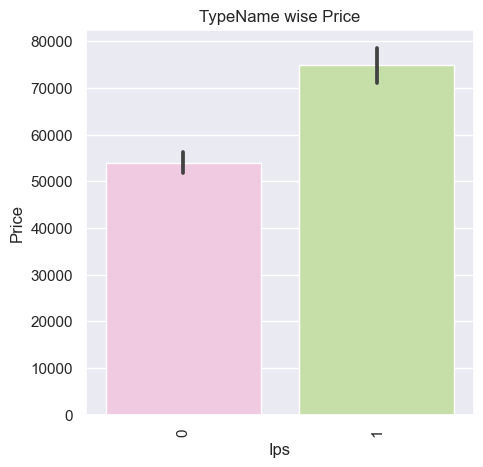

In [19]:
#Touchscreen
sns.countplot(x ='Touchscreen', data = ld,palette ='PiYG')
plt.xticks(rotation='vertical')
plt.title("TypeName wise laptops")
sns.set(rc={"figure.figsize":(5, 5)})
plt.show()

sns.barplot(x="Touchscreen", y="Price", data=ld, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(5, 5)})
plt.title("TypeName wise Price")
plt.show()

#IPs
sns.countplot(x ='Ips', data = ld,palette ='PiYG')
plt.xticks(rotation='vertical')
plt.title("TypeName wise laptops")
sns.set(rc={"figure.figsize":(5, 5)})
plt.show()

#TypeName with Price---------------
sns.barplot(x="Ips", y="Price", data=ld, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(5, 5)})
plt.title("TypeName wise Price")
plt.show()

In [20]:
new = ld['ScreenResolution'].str.split('x',n=1,expand=True)

In [21]:
#Again split screenresolution column
ld['X_res'] = new[0]
ld['Y_res'] = new[1]

In [22]:
ld.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
983,Fujitsu,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4,256GB SSD,Intel HD Graphics 520,Windows 10,2.30,34578.720,0,0,1366,768
409,Lenovo,Notebook,11.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,2,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.15,16221.096,0,0,1366,768
314,Asus,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Celeron Dual Core N3350 1.1GHz,2,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.10,14652.000,1,0,Touchscreen 1366,768
386,Lenovo,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.50,29250.720,0,1,IPS Panel Full HD 1920,1080
958,Dell,Ultrabook,13.3,Quad HD+ 3200x1800,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.30,67559.040,0,0,Quad HD+ 3200,1800


In [23]:
#Edit X-res
ld['X_res'] = ld['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [24]:
ld.sample(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
621,Lenovo,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.65,78055.20,0,0,1920,1080
1217,Lenovo,Notebook,17.3,1600x900,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,No OS,2.80,28717.92,0,0,1600,900


In [25]:
#Change data type
ld['X_res'] = ld['X_res'].astype('int')
ld['Y_res'] = ld['Y_res'].astype('int')

In [26]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


### Work with Price

In [27]:
ld.corr()['Price']

C:\Users\DELL\AppData\Local\Temp\ipykernel_8756\2022385953.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ld.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [28]:
ld['ppi'] = (((ld['X_res']**2) + (ld['Y_res']**2))**0.5/ld['Inches']).astype('float')

In [29]:
ld.corr()['Price']

C:\Users\DELL\AppData\Local\Temp\ipykernel_8756\2022385953.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ld.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [30]:
ld.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
1121,HP,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.160,90043.200,0,0,1920,1080,165.632118
934,Toshiba,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.470,58874.400,0,1,1920,1080,157.350512
670,Microsoft,Ultrabook,13.5,Touchscreen 2256x1504,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Intel Iris Plus Graphics 640,Windows 10 S,1.252,99519.048,1,0,2256,1504,200.842560
1050,Lenovo,Notebook,14.0,IPS Panel 2560x1440,Intel Core i7 6600U 2.6GHz,16,256GB SSD,Intel HD Graphics 520,Windows 7,1.100,139593.600,0,1,2560,1440,209.800683
1001,HP,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.340,63349.920,0,1,1920,1080,165.632118


In [31]:
#drop screenresolution, Inches, X_res and Y_res
ld.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)

In [32]:
ld.sample(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
118,Asus,Notebook,Intel Core i3 6006U 2GHz,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.0,30049.92,0,0,127.335675
91,Acer,Notebook,Intel Core i7 8550U 1.8GHz,8,1TB HDD,Nvidia GeForce MX150,Windows 10,2.2,36709.92,0,0,141.211998


### Work with CPU

In [33]:
ld['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [34]:
#split first 3-words
ld['Cpu Name'] = ld['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [35]:
ld.sample(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
1058,Dell,2 in 1 Convertible,Intel Core i7 7500U 2.7GHz,12,256GB SSD,Intel HD Graphics 620,Windows 10,1.60,69210.7200,1,1,165.632118,Intel Core i7
1236,HP,Ultrabook,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.54,117119.5632,0,0,209.800683,Intel Core i7


In [36]:
#CPU name extration function
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [37]:
ld['Cpu brand'] = ld['Cpu Name'].apply(fetch_processor)

In [38]:
ld.sample(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
428,HP,Gaming,Intel Core i7 7700HQ 2.8GHz,12,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,3.35,106506.72,0,0,127.335675,Intel Core i7,Intel Core i7
669,Acer,Notebook,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,Linux,2.10,21951.36,0,0,100.454670,Intel Core i3,Intel Core i3


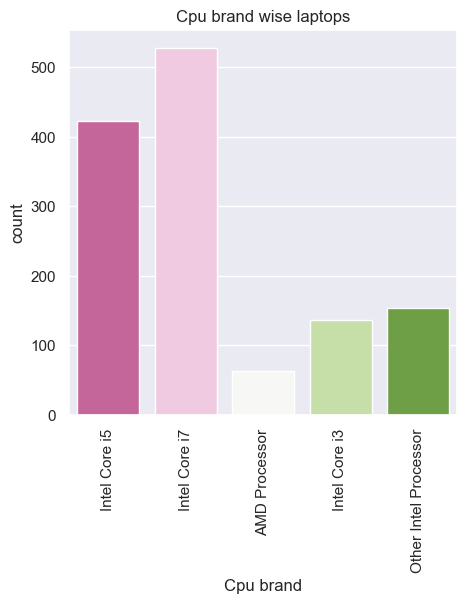

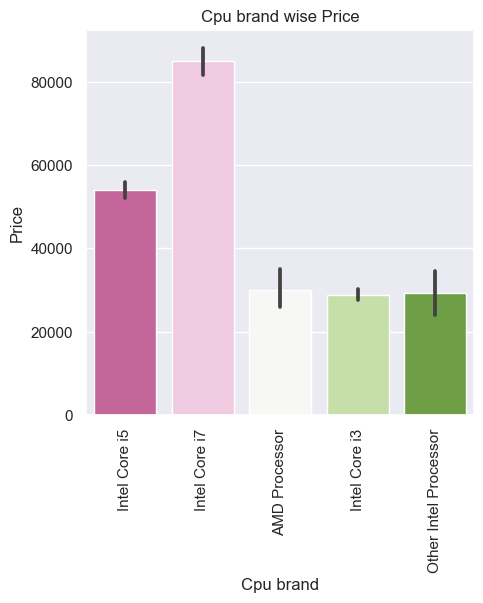

In [39]:
#Cpu brand
sns.countplot(x ='Cpu brand', data = ld,palette ='PiYG')
plt.xticks(rotation='vertical')
plt.title("Cpu brand wise laptops")
sns.set(rc={"figure.figsize":(5, 5)})
plt.show()

sns.barplot(x="Cpu brand", y="Price", data=ld, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(5, 5)})
plt.title("Cpu brand wise Price")
plt.show()

In [40]:
#drop cpu and cpu name 
ld.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [41]:
ld.sample(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
1087,Lenovo,Notebook,8,180GB SSD,Intel HD Graphics 520,Windows 7,1.70,63882.72,0,0,157.350512,Intel Core i5
682,Dell,Gaming,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.21,109277.28,0,0,141.211998,Intel Core i5


### Work with RAM

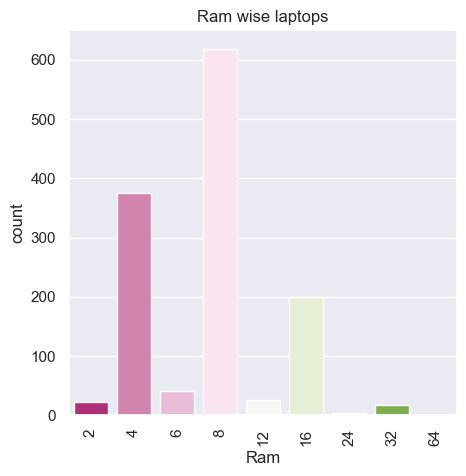

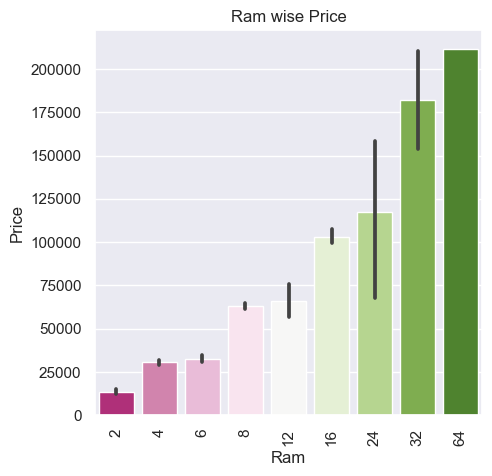

In [42]:
#RAM
sns.countplot(x ='Ram', data = ld,palette ='PiYG')
plt.xticks(rotation='vertical')
plt.title("Ram wise laptops")
sns.set(rc={"figure.figsize":(5, 5)})
plt.show()

sns.barplot(x="Ram", y="Price", data=ld, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(5, 5)})
plt.title("Ram wise Price")
plt.show()

### Work with Memory

In [43]:
print(ld['Memory'].value_counts())

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [44]:
#Split the memory column based on SSD, HDD, TB, Hybrid and Flash storage

ld['Memory'] = ld['Memory'].astype(str).replace('\.0', '', regex=True)
ld["Memory"] = ld["Memory"].str.replace('GB', '')
ld["Memory"] = ld["Memory"].str.replace('TB', '000')
new = ld["Memory"].str.split("+", n = 1, expand = True)

ld["first"]= new[0]
ld["first"]=ld["first"].str.strip()

ld["second"]= new[1]

ld["Layer1HDD"] = ld["first"].apply(lambda x: 1 if "HDD" in x else 0)
ld["Layer1SSD"] = ld["first"].apply(lambda x: 1 if "SSD" in x else 0)
ld["Layer1Hybrid"] = ld["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
ld["Layer1Flash_Storage"] = ld["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

ld['first'] = ld['first'].str.replace(r'\D', '')

ld["second"].fillna("0", inplace = True)

ld["Layer2HDD"] = ld["second"].apply(lambda x: 1 if "HDD" in x else 0)
ld["Layer2SSD"] = ld["second"].apply(lambda x: 1 if "SSD" in x else 0)
ld["Layer2Hybrid"] = ld["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
ld["Layer2Flash_Storage"] = ld["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

ld['second'] = ld['second'].str.replace(r'\D', '')

ld["first"] = ld["first"].astype(int)
ld["second"] = ld["second"].astype(int)

ld["HDD"]=(ld["first"]*ld["Layer1HDD"]+ld["second"]*ld["Layer2HDD"])
ld["SSD"]=(ld["first"]*ld["Layer1SSD"]+ld["second"]*ld["Layer2SSD"])
ld["Hybrid"]=(ld["first"]*ld["Layer1Hybrid"]+ld["second"]*ld["Layer2Hybrid"])
ld["Flash_Storage"]=(ld["first"]*ld["Layer1Flash_Storage"]+ld["second"]*ld["Layer2Flash_Storage"])

ld.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8756\2715484543.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  ld['first'] = ld['first'].str.replace(r'\D', '')
C:\Users\DELL\AppData\Local\Temp\ipykernel_8756\2715484543.py:27: FutureWarning: The default value of regex will change from True to False in a future version.
  ld['second'] = ld['second'].str.replace(r'\D', '')


In [45]:
ld.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
1196,Lenovo,Notebook,4,1000 HDD,AMD Radeon R5 M430,No OS,1.90,19607.040,0,0,100.454670,Intel Core i3,1000,0,0,0
1195,HP,Notebook,12,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.21,70702.560,0,1,141.211998,Intel Core i7,1000,128,0,0
466,Acer,Notebook,4,500 HDD,Nvidia GeForce GTX 940MX,Windows 10,2.20,24988.320,0,0,100.454670,Intel Core i3,500,0,0,0
1156,MSI,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.70,79536.384,0,0,127.335675,Intel Core i7,1000,256,0,0
608,Lenovo,2 in 1 Convertible,8,256 SSD,Intel HD Graphics 630,Windows 10,2.00,69210.720,1,1,141.211998,Intel Core i7,0,256,0,0


C:\Users\DELL\AppData\Local\Temp\ipykernel_8756\1516043900.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ld.corr(), annot=True, cmap=colormap).set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)


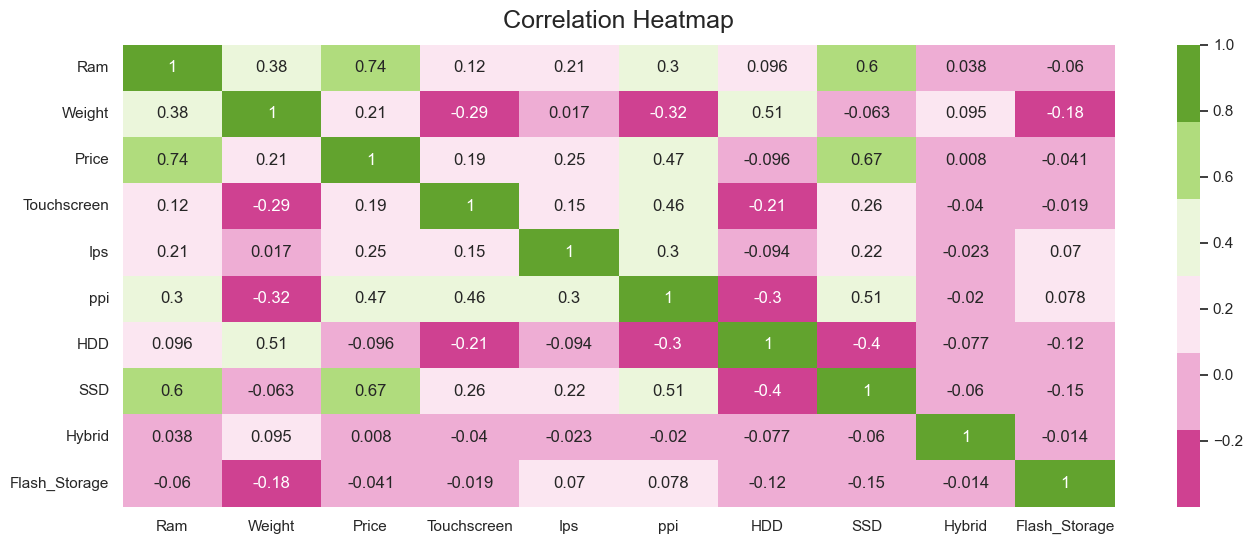

In [46]:
plt.figure(figsize=(16, 6))
colormap = sns.color_palette("PiYG")
sns.heatmap(ld.corr(), annot=True, cmap=colormap).set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show()

In [47]:
ld.drop(columns=['Memory','Hybrid','Flash_Storage'],inplace=True)

In [48]:
ld.sample(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
998,Asus,Gaming,16,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,95850.72,0,0,141.211998,Intel Core i7,1000,256
603,MSI,Gaming,16,Nvidia GeForce GTX 970M,Windows 10,4.14,117162.72,0,0,127.335675,Intel Core i7,1000,128


### Work with GPU

In [49]:
print(ld['Gpu'].value_counts())

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64


In [50]:
#split first 3-words
ld['Gpu Brand'] = ld['Gpu'].apply(lambda x:x.split()[0])

In [51]:
ld.head(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel


In [52]:
#drop GPU 
ld.drop(columns=['Gpu'],inplace=True)

In [53]:
ld['Gpu Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu Brand, dtype: int64

In [54]:
#drop ARM GPU
ld = ld[ld['Gpu Brand'] != 'ARM']

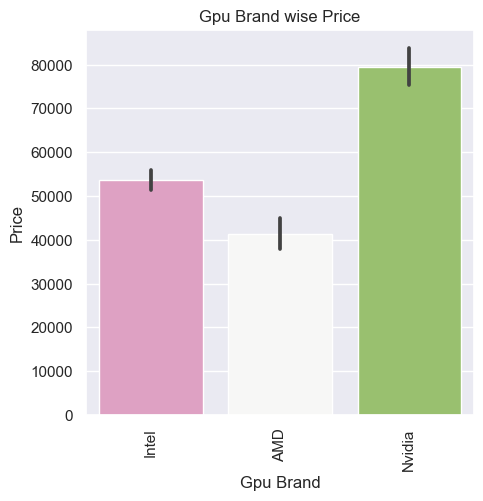

In [55]:
sns.barplot(x="Gpu Brand", y="Price", data=ld, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(5, 5)})
plt.title("Gpu Brand wise Price")
plt.show()

### Work with Ops

In [56]:
print(ld['OpSys'].value_counts())

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64


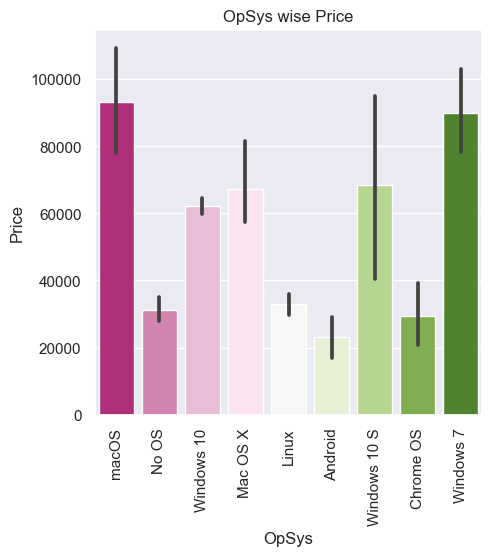

In [57]:
sns.barplot(x="OpSys", y="Price", data=ld, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(5, 5)})
plt.title("OpSys wise Price")
plt.show()

In [58]:
#OPs extrating function

def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others'

In [59]:
ld['os'] = ld['OpSys'].apply(cat_os)

In [60]:
ld.head(2)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac


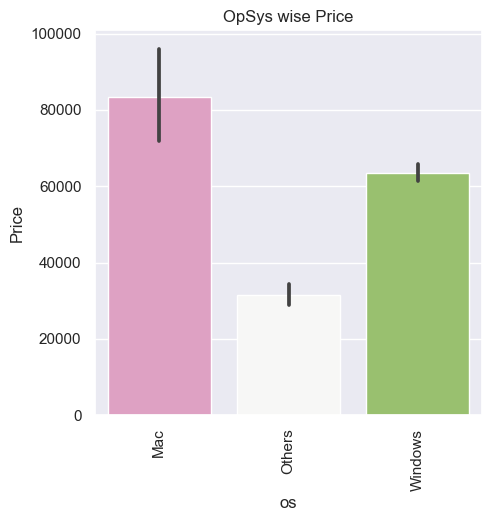

In [61]:
sns.barplot(x="os", y="Price", data=ld, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(5, 5)})
plt.title("OpSys wise Price")
plt.show()

In [62]:
ld.drop(columns=['OpSys'],inplace=True)

In [63]:
ld.sample(2)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
837,Toshiba,Notebook,4,2.0,35644.32,0,0,100.454670,Intel Core i3,500,0,Intel,Windows
829,Acer,Notebook,8,1.5,32980.32,0,1,157.350512,Intel Core i3,0,128,Intel,Windows


### Work with Weight

C:\Users\DELL\AppData\Local\Temp\ipykernel_8756\3169486734.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ld['Weight'],


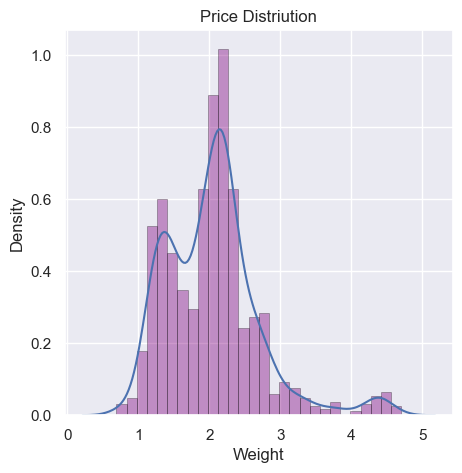

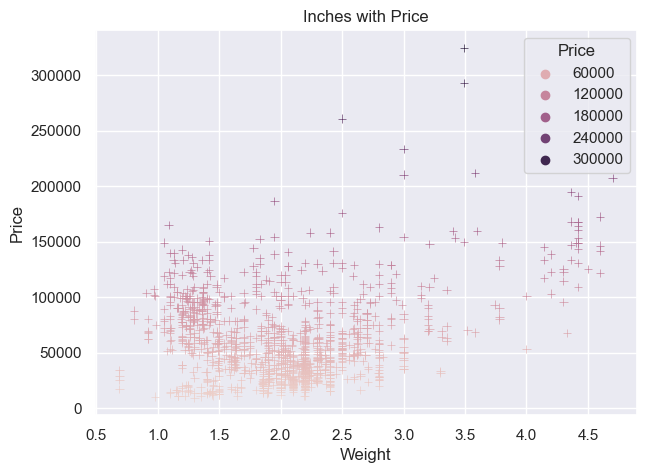

C:\Users\DELL\AppData\Local\Temp\ipykernel_8756\3169486734.py:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ld.corr(), annot=True, cmap=colormap).set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)


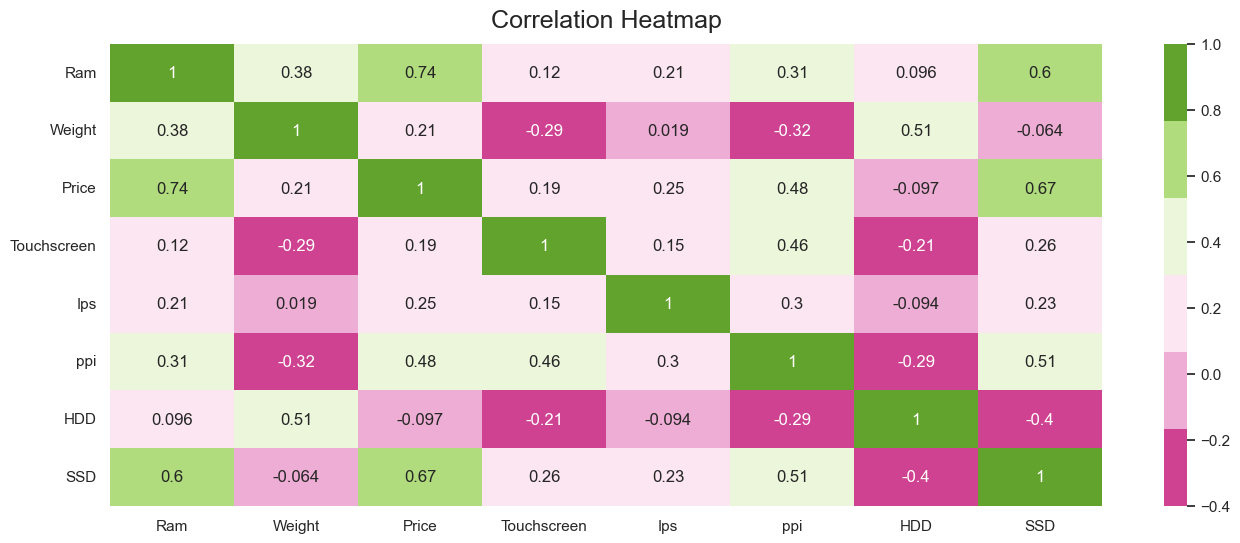

In [64]:
#Distplot------------
sns.distplot(ld['Weight'],
             hist_kws={'color':'purple', 'edgecolor':'black',
                       'linewidth':.5, 'linestyle':'-'})
sns.set(rc={"figure.figsize":(7, 5)})
plt.title("Price Distriution")
plt.show()

#Scatterplot------------
seaborn.scatterplot(x="Weight",
                    y="Price",
                    hue="Price",
                    marker = '+',
                    data=ld)
plt.title("Inches with Price")
sns.set(rc={"figure.figsize":(8, 8)})
plt.show()

#Let's see corr on weight
plt.figure(figsize=(16, 6))
colormap = sns.color_palette("PiYG")
sns.heatmap(ld.corr(), annot=True, cmap=colormap).set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show()

### Work with price

C:\Users\DELL\AppData\Local\Temp\ipykernel_8756\2399194448.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(ld['Price']),hist_kws={'color':'purple', 'edgecolor':'black',


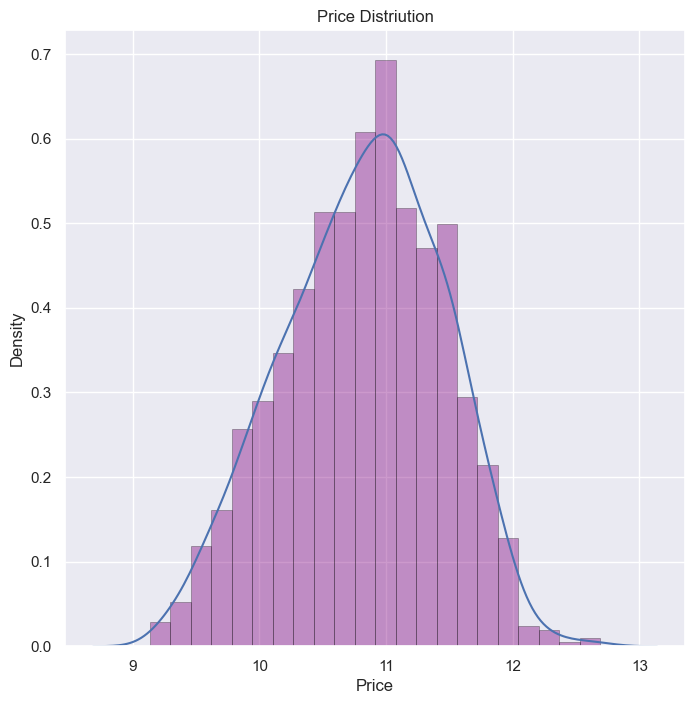

In [65]:
#Apply Log in price function
sns.distplot(np.log(ld['Price']),hist_kws={'color':'purple', 'edgecolor':'black',
                       'linewidth':.5, 'linestyle':'-'})
sns.set(rc={"figure.figsize":(7, 5)})
plt.title("Price Distriution") #It's normal distribution
plt.show()

# It's time to Model Building

In [66]:
#Divide the data for x and y
X = ld.drop(columns=['Price'])
y = np.log(ld['Price'])

In [67]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [68]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

### Train_Test Split

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [70]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others


In [71]:
X_test

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
248,HP,Notebook,4,1.49,0,1,165.632118,Intel Core i5,500,0,Intel,Windows
555,Asus,Notebook,4,2.00,0,0,100.454670,Other Intel Processor,500,0,Intel,Others
1251,HP,Notebook,4,1.86,0,0,100.454670,AMD Processor,500,0,AMD,Windows
547,Lenovo,Notebook,4,2.15,0,0,141.211998,Intel Core i5,1000,0,Intel,Others
885,HP,2 in 1 Convertible,4,1.28,1,0,165.632118,Intel Core i5,0,256,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
1129,HP,Gaming,8,3.35,0,1,127.335675,Intel Core i5,1000,128,Nvidia,Windows
172,Lenovo,Notebook,4,2.20,0,0,100.454670,AMD Processor,500,0,AMD,Others
322,Asus,Notebook,8,2.00,0,0,157.350512,Intel Core i7,0,256,Intel,Windows
996,HP,Ultrabook,8,1.11,1,1,165.632118,Intel Core i7,0,256,Intel,Windows


In [72]:
!pip install xgboost

In [73]:
#Import all ML algoritham 

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [74]:
#creating dictionary for storing different models accuracy
model_comparison={}

### Model 1 : Linear Regression

In [75]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

accuracies = cross_val_score(estimator = pipe, X = X_train, y = y_train, cv = 5)

print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

model_comparison['Linear Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

R2 Score : 80.73%
MAE : 21.02%
MSE : 7.37%
Cross Val Accuracy: 81.79 %


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `spa

### Model 2 : Ridge Regression

In [76]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

accuracies = cross_val_score(estimator = pipe, X = X_train, y = y_train, cv = 5)

print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

model_comparison['Linear Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `spa

R2 Score : 81.27%
MAE : 20.93%
MSE : 7.16%
Cross Val Accuracy: 80.76 %


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Model 3 : Lasso Regression

In [77]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

accuracies = cross_val_score(estimator = pipe, X = X_train, y = y_train, cv = 5)

print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

model_comparison['Lasso Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score : 80.72%
MAE : 21.11%
MSE : 7.38%
Cross Val Accuracy: 80.92 %


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `spa

### Model 4 : KNN Regression

In [78]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

accuracies = cross_val_score(estimator = pipe, X = X_train, y = y_train, cv = 5)

print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

model_comparison['KNN Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `spa

R2 Score : 80.28%
MAE : 19.35%
MSE : 7.55%
Cross Val Accuracy: 76.42 %


### Model 5 : DecisionTree Regression

In [79]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

accuracies = cross_val_score(estimator = pipe, X = X_train, y = y_train, cv = 5)

print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

model_comparison['DecisionTree Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

R2 Score : 83.99%
MAE : 18.20%
MSE : 6.12%
Cross Val Accuracy: 80.04 %


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `spa

### Model 6 : SVR Regression

In [80]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

accuracies = cross_val_score(estimator = pipe, X = X_train, y = y_train, cv = 5)

print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

model_comparison['SVR Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `spa

R2 Score : 80.83%
MAE : 20.24%
MSE : 7.33%
Cross Val Accuracy: 80.24 %


### Model 7 : RandomForest Regression

In [81]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.10,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

accuracies = cross_val_score(estimator = pipe, X = X_train, y = y_train, cv = 5)

print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

model_comparison['RandomForest Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `spa

R2 Score : 89.49%
MAE : 15.55%
MSE : 4.02%
Cross Val Accuracy: 85.91 %


### Model 8 : ExtraTrees Regression

In [84]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

accuracies = cross_val_score(estimator = pipe, X = X_train, y = y_train, cv = 5)

print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

model_comparison['ExtraTrees Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `spa

R2 Score : 87.54%
MAE : 15.98%
MSE : 4.77%
Cross Val Accuracy: 85.70 %


### Model 8 : AdaBoost Regression

In [85]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

accuracies = cross_val_score(estimator = pipe, X = X_train, y = y_train, cv = 5)

print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

model_comparison['AdaBoost Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `spa

R2 Score : 78.67%
MAE : 23.18%
MSE : 8.16%
Cross Val Accuracy: 78.43 %


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Model 9 : GradientBoosting Regression

In [86]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

accuracies = cross_val_score(estimator = pipe, X = X_train, y = y_train, cv = 5)

print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

model_comparison['GradientBoosting Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `spa

R2 Score : 88.09%
MAE : 15.95%
MSE : 4.55%
Cross Val Accuracy: 87.90 %


### Model 10 : XGB Regression

In [87]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

accuracies = cross_val_score(estimator = pipe, X = X_train, y = y_train, cv = 5)

print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

model_comparison['XGB Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `spa

R2 Score : 87.71%
MAE : 16.26%
MSE : 4.70%
Cross Val Accuracy: 86.05 %


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Model 11 : Voting Regression

In [88]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

accuracies = cross_val_score(estimator = pipe, X = X_train, y = y_train, cv = 5)

print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

model_comparison['Voting Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.

### Model 12 : Stacking Regression

In [89]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

accuracies = cross_val_score(estimator = pipe, X = X_train, y = y_train, cv = 5)

print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

model_comparison['Stacking Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `spa

R2 Score : 88.09%
MAE : 16.62%
MSE : 4.56%
Cross Val Accuracy: 86.64 %


# Model Comparison

In [90]:
Model_com_ld=pd.DataFrame(model_comparison).T
Model_com_ld.columns=['R2 Score','MAE','MSE','Cross Val Accuracy']
Model_com_ld=Model_com_ld.sort_values(by='R2 Score',ascending=False)

In [ ]:
Model = Model_com_ld.style.format("{:.2%}").background_gradient(cmap='RdPu')

In [ ]:
Max = Model_com_ld.style.highlight_max().set_caption("Maximum Score in each Column").format("{:.2%}")

In [ ]:
Min = Model_com_ld.style.highlight_min().set_caption("Minimum Score in each Column").format("{:.2%}")

In [ ]:
Model

In [ ]:
Min

In [ ]:
Max